1-Charger le jeu de données à l’aide de Pandas.

Analyse des Données de Santé Publique

In [111]:
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = ps.read_csv('DataSet.csv')

2-Afficher la taille (dimensions) du dataset (lignes, colonnes).

In [112]:
rows, columns= data.shape
print(f"rows  : {rows} || columns : {columns}")

rows  : 5735 || columns : 28


3-Lister les colonnes disponibles dans le dataset.

In [113]:
columnss= data.columns.tolist()
print(columnss)

['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210']


Créer un sous-ensemble du jeu de données contenant uniquement les colonnes suivantes : 
['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI'].

In [114]:
clm=['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']
new_data = ps.DataFrame(data[clm])


Afficher les informations générales (.info()) sur ce sous-ensemble.

In [115]:
print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
None


Renommer les colonnes avec des noms plus explicites :
['seqn','smoking','gender', 'age','education','weight','height','bmi'].

In [116]:
new_data.columns=['seqn','smoking','gender', 'age','education','weight','height','bmi']
print(new_data)

       seqn  smoking  gender  age  education  weight  height   bmi
0     83732        1       1   62        5.0    94.8   184.5  27.8
1     83733        1       1   53        3.0    90.4   171.4  30.8
2     83734        1       1   78        3.0    83.4   170.1  28.8
3     83735        2       2   56        5.0   109.8   160.9  42.4
4     83736        2       2   42        4.0    55.2   164.9  20.3
...     ...      ...     ...  ...        ...     ...     ...   ...
5730  93695        1       2   76        3.0    59.1   165.8  21.5
5731  93696        2       1   26        5.0   112.1   182.2  33.8
5732  93697        1       2   80        4.0    71.7   152.2  31.0
5733  93700        1       1   35        1.0    78.2   173.3  26.0
5734  93702        2       2   24        5.0    58.3   165.0  21.4

[5735 rows x 8 columns]


Vérifier la présence de doublons dans le dataset.

In [117]:
duplicated =new_data.duplicated()


Supprimer les doublons si nécessaire.

In [118]:
new_data= new_data.drop_duplicates()


Supprimer la colonne 'seqn', considérée comme un identifiant inutile pour l’analyse.

In [119]:
new_data=new_data.drop('seqn',axis=1)

Identifier les valeurs manquantes (NaN) dans les colonnes.

In [120]:
print(new_data.isna().sum())

smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64


Remplacer les valeurs manquantes :

    education : remplacer par la médiane

    weight, height, bmi : remplacer par la moyenne

In [121]:
new_data = new_data.fillna({
    'education':new_data['education'].median(),
    'weight':new_data['weight'].mean(),
    'height':new_data['height'].mean(),
    'bmi':new_data['bmi'].mean(),
})


Afficher les statistiques descriptives (moyenne, écart-type, min, max, etc.) du dataset.

In [122]:
print(new_data.describe())

           smoking       gender          age    education       weight  \
count  5735.000000  5735.000000  5735.000000  5735.000000  5735.000000   
mean      1.607149     1.518919    48.052310     3.467132    81.342676   
std       0.571975     0.499686    18.431011     1.284826    21.633062   
min       1.000000     1.000000    18.000000     1.000000    32.400000   
25%       1.000000     1.000000    32.000000     3.000000    66.100000   
50%       2.000000     2.000000    48.000000     4.000000    78.400000   
75%       2.000000     2.000000    63.000000     4.000000    92.600000   
max       9.000000     2.000000    80.000000     9.000000   198.900000   

            height          bmi  
count  5735.000000  5735.000000  
mean    166.142834    29.382197  
std      10.024624     7.050607  
min     129.700000    14.500000  
25%     158.750000    24.400000  
50%     166.142834    28.400000  
75%     173.400000    33.000000  
max     202.700000    67.300000  


Détecter les valeurs aberrantes (outliers) à l’aide de méthodes statistiques.

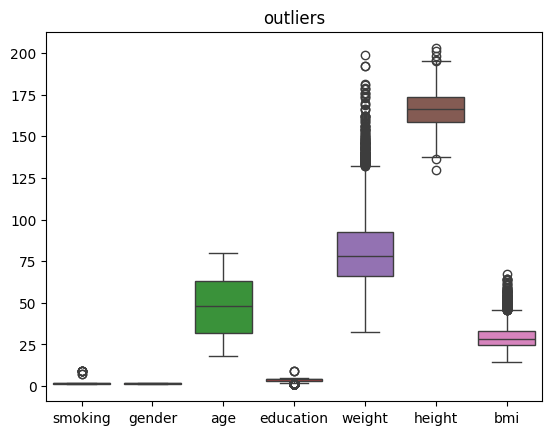

In [123]:
sns.boxplot(new_data)
plt.title("outliers")
plt.show()

Supprimer les outliers pour améliorer la qualité des données.

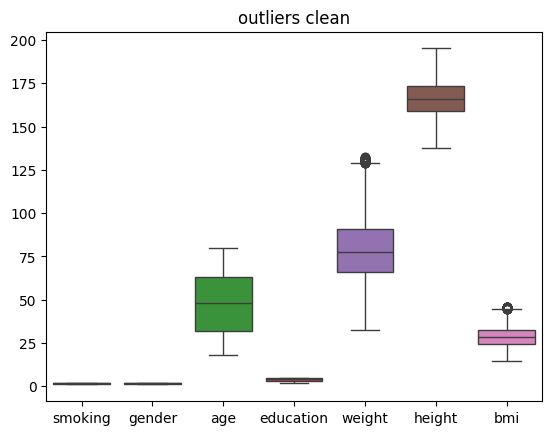

In [124]:
Q1 = new_data.quantile(0.25)
Q3 = new_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_clean = new_data[(new_data>=lower_bound)&(new_data<=upper_bound)]
sns.boxplot(data_clean)
plt.title("outliers clean")
plt.show()

    Remplacer les codes numériques par des labels explicites dans trois colonnes :

    smoking : {1: 'yes', 2: 'no', 7: nan, 8: nan}

    gender : {1: 'male', 2: 'female'}

    education :
      {    1: '<9th grade', 2: '9-11th grade', 3: 'HS or GED', 4: 'Some college / AA', 5: 'College or above', 7: 'Other', 8: 'Other'}

In [130]:
smoking_map = {1: 'yes', 2: 'no', 7: np.nan, 8: np.nan}
gender_map = {1: 'male', 2: 'female'}
education_map = {
    1: '<9th grade',
    2: '9-11th grade',
    3: 'HS or GED',
    4: 'Some college / AA',
    5: 'College or above',
    7: 'Other',
    8: 'Other'
}

new_data['smoking'] = new_data['smoking'].replace(smoking_map)
new_data['gender'] = new_data['gender'].replace(gender_map)
new_data['education'] = new_data['education'].replace(education_map)
print(new_data)

     smoking  gender  age          education  weight  height   bmi
0        yes    male   62   College or above    94.8   184.5  27.8
1        yes    male   53          HS or GED    90.4   171.4  30.8
2        yes    male   78          HS or GED    83.4   170.1  28.8
3         no  female   56   College or above   109.8   160.9  42.4
4         no  female   42  Some college / AA    55.2   164.9  20.3
...      ...     ...  ...                ...     ...     ...   ...
5730     yes  female   76          HS or GED    59.1   165.8  21.5
5731      no    male   26   College or above   112.1   182.2  33.8
5732     yes  female   80  Some college / AA    71.7   152.2  31.0
5733     yes    male   35         <9th grade    78.2   173.3  26.0
5734      no  female   24   College or above    58.3   165.0  21.4

[5735 rows x 7 columns]


Analyser les relations entre variables :

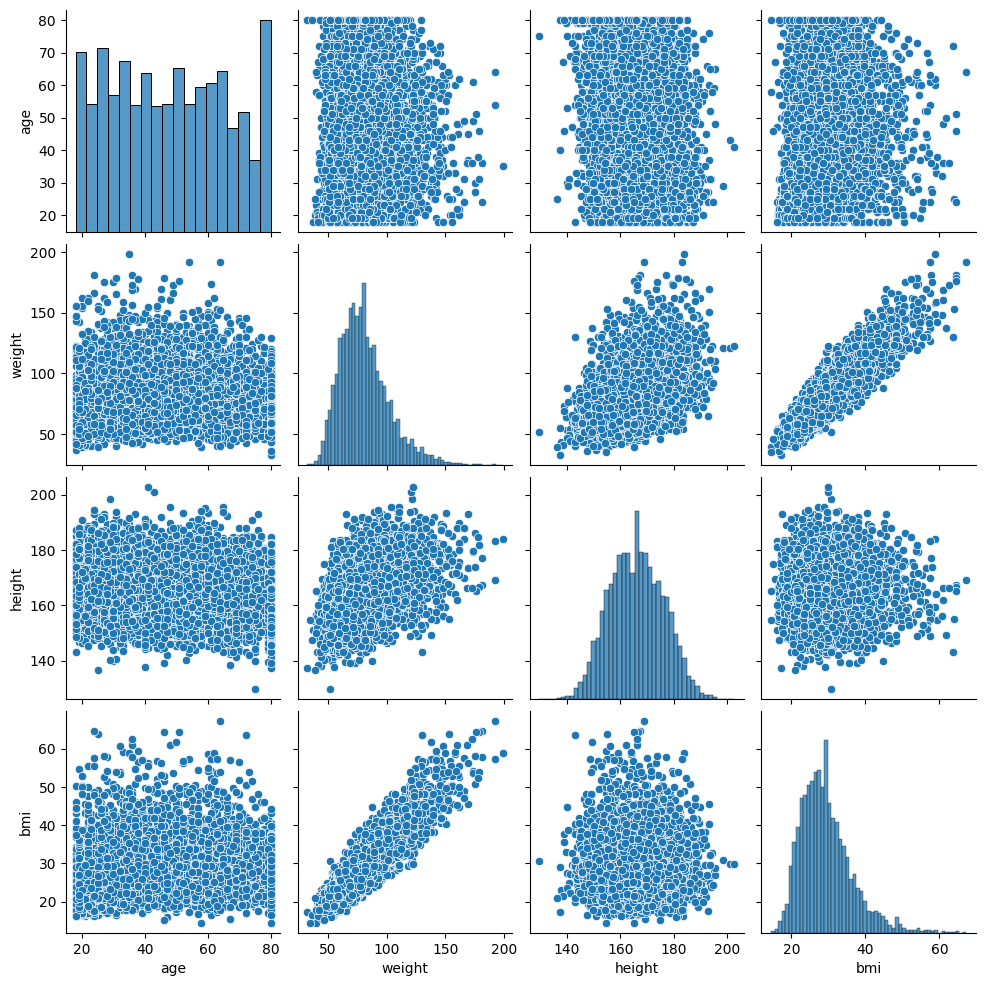

In [134]:
sns.pairplot(new_data.dropna())
plt.show()

Sauvegarder le dataset nettoyé au format CSV (ou autre)

In [135]:
new_data.to_csv('clean_data.csv' , index= False)